In [3]:
pip install pandas matplotlib scikit-learn tensorflow

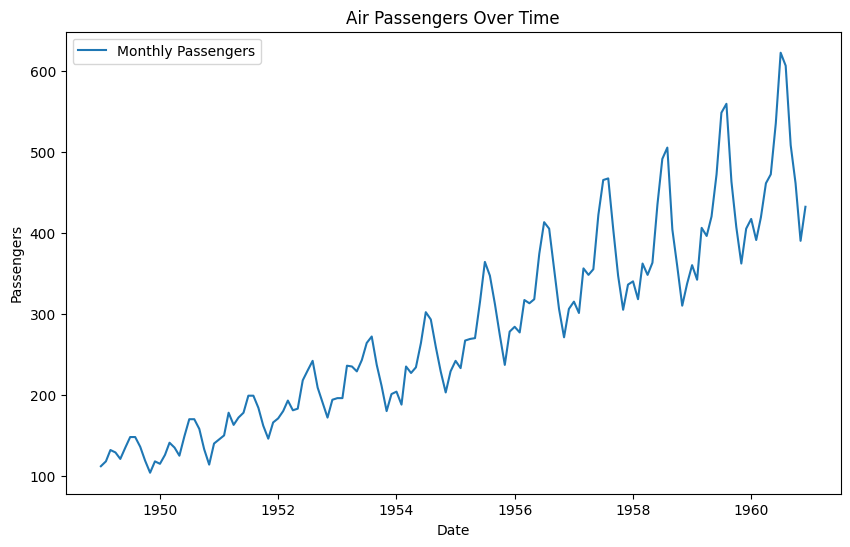

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.1124 - val_loss: 0.1471
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0172 - val_loss: 0.0270
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0103 - val_loss: 0.0531
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0107 - val_loss: 0.0360
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0098 - val_loss: 0.0215
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - val_loss: 0.0228
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059 - val_loss: 0.0238
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0067 - val_loss: 0.0215
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0072 - val_loss: 0.0218
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0067 - val_loss: 0.0210
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0062 - val_l

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


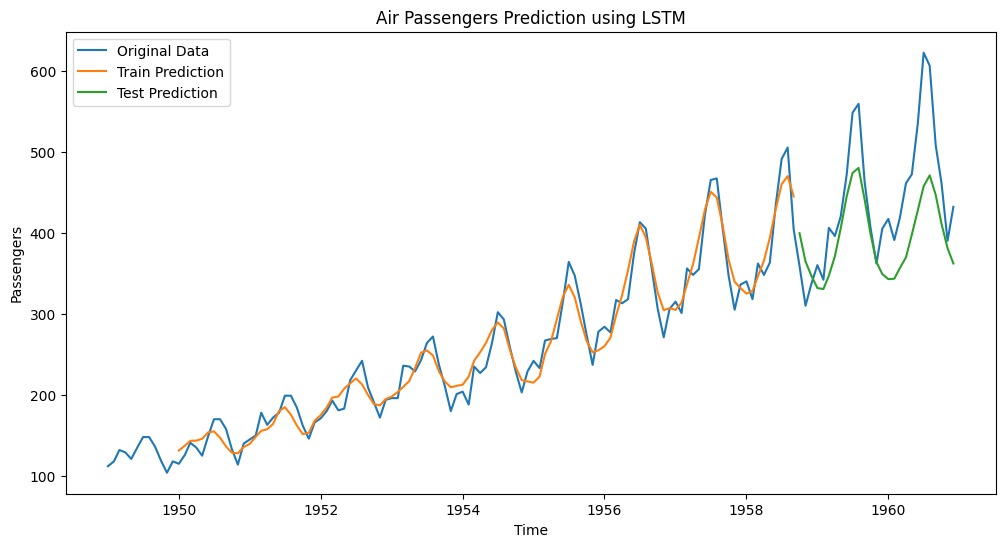

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Step 2: Load the Dataset
df = pd.read_csv('/content/AirPassengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 3: Visualize the Data
plt.figure(figsize=(10,6))
plt.plot(df, label='Monthly Passengers')
plt.title("Air Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Step 4: Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 5: Create Sequences for Supervised Learning
def create_sequences(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_sequences(data_scaled, time_step)

# Step 6: Split into Training and Testing Sets
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Step 7: Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # 1) Explicit Input layer declares the shape
    Input(shape=(time_step, 1)),

    # 2) First LSTM no longer needs input_shape
    LSTM(64, return_sequences=True),

    # 3) Second LSTM
    LSTM(32),

    # 4) Final dense output
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Step 9: Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Step 10: Inverse Transform the Predictions
train_predict_inv = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Step 11: Plot the Predictions
plt.figure(figsize=(12,6))
# Original data
plt.plot(df.index, scaler.inverse_transform(data_scaled), label='Original Data')

# Train predictions
train_dates = df.index[time_step:split+time_step]
plt.plot(train_dates, train_predict_inv, label='Train Prediction')

# Test predictions
test_dates = df.index[split+time_step:]
plt.plot(test_dates, test_predict_inv, label='Test Prediction')

plt.title('Air Passengers Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()
